In [7]:
import pandas as pd
from pandas import DataFrame

path_data: str = ('../../data/processed/all_games_merged_old_processed.jsonl')
save_path: str = ('../../data/training_data/D20001.csv')

all_data: pd.DataFrame = pd.read_json(path_data, lines=True)

In [9]:
all_data.head()

,game,game_id,model,benchmark_version,experiment,episode,Aborted,Lose,Success,chat,target,player
0,wordle,1,claude-v1.3-t0.0--claude-v1.3-t0.0,v0.9,0_high_frequency_words_no_clue_no_critic,episode_0,0,1,0,"[{'role': 'user', 'content': 'You are a langua...",acute,Player 1
1,wordle,2,claude-v1.3-t0.0--claude-v1.3-t0.0,v0.9,0_high_frequency_words_no_clue_no_critic,episode_1,0,1,0,"[{'role': 'user', 'content': 'You are a langua...",blade,Player 1
2,wordle,3,claude-v1.3-t0.0--claude-v1.3-t0.0,v0.9,0_high_frequency_words_no_clue_no_critic,episode_2,0,1,0,"[{'role': 'user', 'content': 'You are a langua...",wacky,Player 1
3,wordle,4,claude-v1.3-t0.0--claude-v1.3-t0.0,v0.9,0_high_frequency_words_no_clue_no_critic,episode_3,0,1,0,"[{'role': 'user', 'content': 'You are a langua...",extol,Player 1
4,wordle,5,claude-v1.3-t0.0--claude-v1.3-t0.0,v0.9,0_high_frequency_words_no_clue_no_critic,episode_4,0,1,0,"[{'role': 'user', 'content': 'You are a langua...",polka,Player 1


In [10]:
# The list of the top 10 models from benchmark version 0.9-1.0
top_10_models: list = [
    'gpt-4-0613-t0.0--gpt-4-0613-t0.0',
    'claude-v1.3-t0.0--claude-v1.3-t0.0',
    'gpt-4-1106-preview-t0.0--gpt-4-1106-preview-t0.0',
    'gpt-4-t0.0--gpt-4-t0.0',
    'gpt-4-0314-t0.0--gpt-4-0314-t0.0',
    'claude-2.1-t0.0--claude-2.1-t0.0',
    'gpt-4-t0.0--gpt-3.5-turbo-t0.0',
    'claude-2-t0.0--claude-2-t0.0',
    'gpt-3.5-turbo-1106-t0.0--gpt-3.5-turbo-1106-t0.0',
    'gpt-3.5-turbo-0613-t0.0--gpt-3.5-turbo-0613-t0.0',
]

In [11]:
data_top_k: DataFrame = all_data[all_data.model.isin(top_10_models)]
data_successful: DataFrame = data_top_k[data_top_k.Success == 1]

In [12]:
len(data_top_k), len(data_successful)

(4565, 2177)

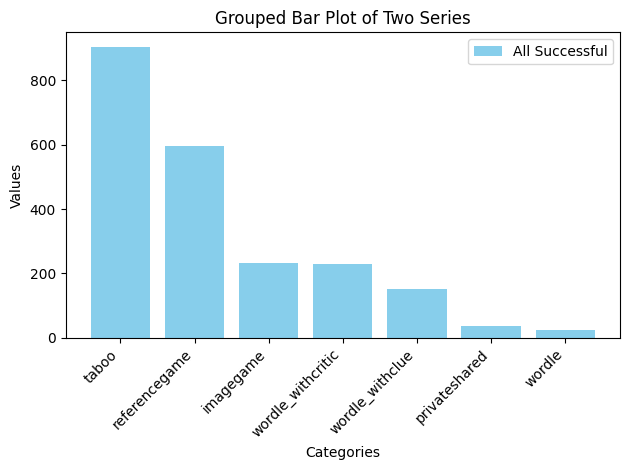

In [13]:
import matplotlib.pyplot as plt
import numpy as np

series1 = data_successful.game.value_counts()

# Set the positions and width for the bars
index = np.arange(len(series1))  # The label locations

# Create the bar plots for both series
plt.bar(index, series1, label='Series 1', color='skyblue')

# Adding labels, title, and legend
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Grouped Bar Plot of Two Series')
plt.legend([ 'All Successful'])  # Show legend
plt.xticks(index, series1.index, rotation=45, ha='right')  # Center x-tick labels


# Show the plot
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()

In [14]:
data_successful.to_csv(save_path, index=False)